In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2)
ket = Statevector(qc)
ket.draw()


'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [4]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [6]:
qc.x(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [7]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],\n            dims=(2, 2))'

In [8]:

qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [9]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [11]:
MESSAGE='00'
#encoding message
qc_shreya = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_shreya.x(0)
if MESSAGE[-2]=='1':
    qc_shreya.x(1)

In [12]:
from qiskit import Aer
#decoding
backend = Aer.get_backend('aer_simulator')
qc_riya = QuantumCircuit(2,2)
qc_riya.measure([0,1],[0,1])

backend.run(qc_shreya.compose(qc_riya)).result().get_counts()

{'00': 1024}

In [ ]:
#the above program did not involve entaglement 


In [13]:
#creating entaglement 
MESSAGE = '00'

qc_shreya = QuantumCircuit(2,2)

# encodes the message
if MESSAGE[-1]=='1':
    qc_shreya.x(0)
if MESSAGE[-2]=='1':
    qc_shreya.x(1)

# creates entangled states
qc_shreya.h(1)
qc_shreya.cx(1,0)

ket = Statevector(qc_shreya)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

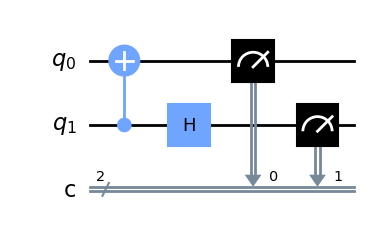

In [14]:
qc_riya = QuantumCircuit(2,2)
# disentangles
qc_riya.cx(1,0)
qc_riya.h(1)
# Then measures
qc_riya.measure([0,1],[0,1])

qc_riya.draw()

In [16]:
#creating entangled state and changing it 
MESSAGE = '00'

qc_shreya = QuantumCircuit(2,2)
qc_shreya.h(1)
qc_shreya.cx(1,0)

if MESSAGE[-2]=='1':
    qc_shreya.z(1)
if MESSAGE[-1]=='1':
    qc_shreya.x(1)

ket = Statevector(qc_shreya)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [19]:
from qiskit import Aer
#decoding
backend = Aer.get_backend('aer_simulator')
qc_riya = QuantumCircuit(2,2)
qc_riya.measure([0,1],[0,1])

backend.run(qc_shreya.compose(qc_riya)).result().get_counts()

{'11': 530, '00': 494}

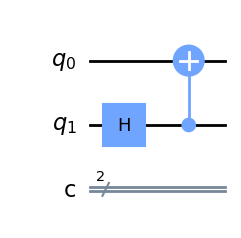

In [21]:
qc_e = QuantumCircuit(2,2)
qc_e.h(1)
qc_e.cx(1,0)

qc_e.draw()

In [22]:
MESSAGE = '01'

qc_shreya = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_shreya.z(1)
if MESSAGE[-1]=='1':
    qc_shreya.x(1)

In [ ]:
complete_qc = qc_e.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()